In [1]:
import sys
from pathlib import Path
import pandas as pd
from cogwheel import gw_plotting, gw_utils, utils
sys.path.insert(0, str(Path.cwd().parent))
from dot_pe import sample_banks, config

In [2]:
bank_dir = Path("test_bank")
sample_banks.main(
    bank_size=2**12,
    q_min=1 / 6,
    m_min=50,
    m_max=100,
    inc_faceon_factor=1.0,
    f_ref=50.0,
    fbin=config.DEFAULT_FBIN,
    n_pool=4,
    blocksize=1024,
    approximant="IMRPhenomXODE",
    bank_dir=bank_dir,
)

2025-09-02 14:05:39,154 - INFO - dot_pe.waveform_banks started at Tue Sep  2 14:05:39 2025


Generating intrinsic samples
Saved intrinsic samples to test_bank/intrinsic_sample_bank.feather
Auto-detected 4 missing blocks: [0, 1, 2, 3]
Creating waveforms


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-09-02 14:05:57,200 - INFO - dot_pe.waveform_banks finished after 18 seconds (0.301 minutes).


waveform bank created at test_bank/waveforms


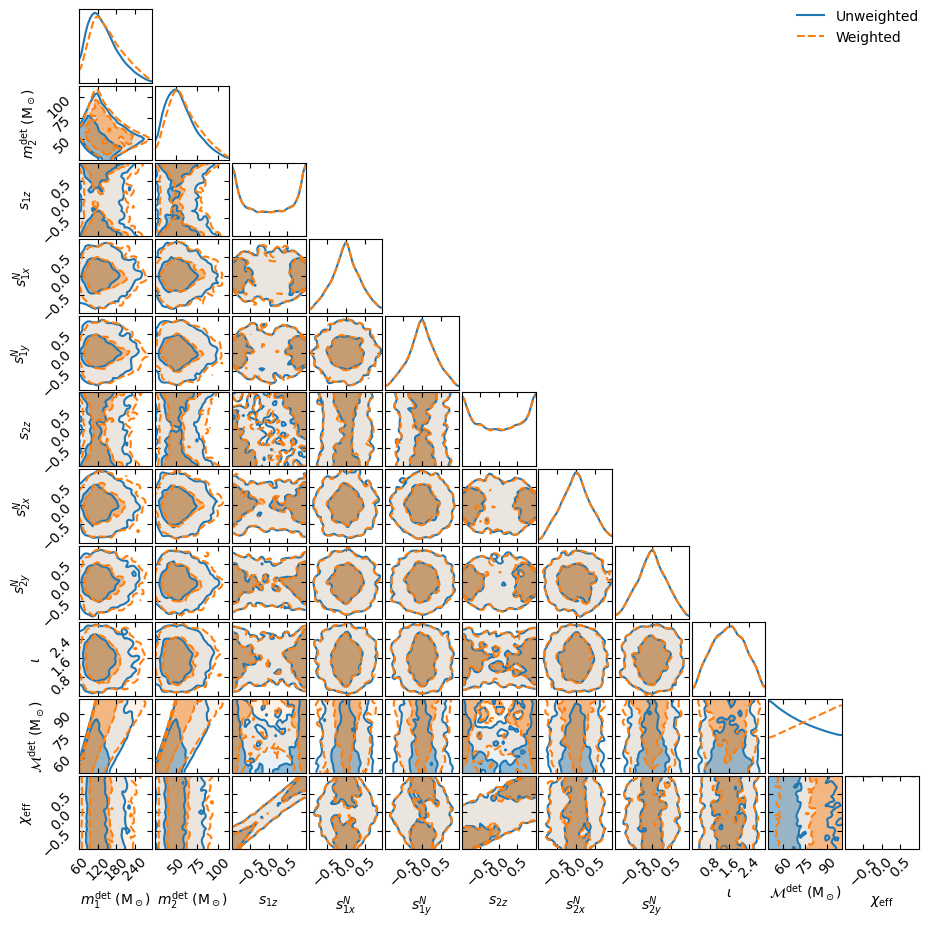

In [3]:
samples = pd.read_feather(bank_dir / "intrinsic_sample_bank.feather")
samples["mchirp"] = gw_utils.m1m2_to_mchirp(samples["m1"], samples["m2"])
samples["chieff"] = gw_utils.chieff(*samples[["m1", "m2", "s1z", "s2z"]].values.T)

weighted_samples = samples.copy()
weighted_samples["weights"] = utils.exp_normalize(
    weighted_samples["log_prior_weights"].values
)
samples["weights"] = 1.0
gw_plotting.MultiCornerPlot(
    [samples, weighted_samples],
    smooth=1,
    params=[c for c in samples.columns if "weights" not in c],
    labels=["Unweighted", "Weighted"],
).plot()